In [1]:
from currency_converter import CurrencyConverter
import pandas as pd
import plotly.graph_objects as go

# Descripción del set de datos

Dataset de estudio: https://www.kaggle.com/gauthamp10/google-playstore-apps.

Dataset usado en el trabajo: 
https://drive.google.com/file/d/16Mc_UjQ5XtlYTL9KMtzdHyiJ61OulY5S/view?usp=sharing


In [2]:
datos = pd.read_csv('Google-Playstore.csv', sep = ',', parse_dates = ['Last Updated', 'Released'])

In [3]:
datos.shape

(1118136, 23)

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   App Name           1118135 non-null  object        
 1   App Id             1118136 non-null  object        
 2   Category           1118133 non-null  object        
 3   Rating             1111286 non-null  float64       
 4   Rating Count       1111286 non-null  float64       
 5   Installs           1117975 non-null  object        
 6   Minimum Installs   1117975 non-null  float64       
 7   Maximum Installs   1118136 non-null  int64         
 8   Free               1118136 non-null  bool          
 9   Price              1118136 non-null  float64       
 10  Currency           1117975 non-null  object        
 11  Size               1118136 non-null  object        
 12  Minimum Android    1116123 non-null  object        
 13  Developer Id       1118134 

In [5]:
datos.describe().apply(lambda s: s.apply(lambda x: format(x, '.4f')))

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,1111286.0000,1111286.0000,1117975.0000,1118136.0000,1118136.0000
mean,2.4903,5159.6332,313643.2314,544453.3725,0.2051
std,2.0540,272409.4451,20439406.3541,30310580.6522,3.5410
min,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,100.0000,160.0000,0.0000
50%,3.6000,11.0000,1000.0000,1719.0000,0.0000
75%,4.3000,100.0000,10000.0000,19116.0000,0.0000
max,5.0000,125380770.0000,10000000000.0000,10772700105.0000,400.0000


In [6]:
datos.describe(include = [bool])

,Free,Ad Supported,In App Purchases,Editors Choice
count,1118136,1118136,1118136,1118136
unique,2,2,2,2
top,True,True,False,False
freq,1071333,725816,998025,1117388


In [7]:
datos.describe(include = [object])

,App Name,App Id,Category,Installs,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Content Rating,Privacy Policy
count,1118135,1118136,1118133,1117975,1117975,1118136,1116123,1118134,703770,1118114,1118136,964612
unique,1046869,1118136,48,22,54,1482,139,165593,256899,261786,6,380030
top,Tic Tac Toe,com.httrack.android,Education,"1,000+",USD,Varies with device,4.1 and up,Subsplash Inc,http://www.subsplash.com/,support@classplus.co,Everyone,http://www.cmcm.com/protocol/launcher-theme/pr...
freq,143,1,115242,198309,1075136,37254,344239,538,706,1529,968246,1805


In [8]:
datos.isnull().sum()

App Name                  1
App Id                    0
Category                  3
Rating                 6850
Rating Count           6850
Installs                161
Minimum Installs        161
Maximum Installs          0
Free                      0
Price                     0
Currency                161
Size                      0
Minimum Android        2013
Developer Id              2
Developer Website    414366
Developer Email          22
Released               7730
Last Updated              0
Content Rating            0
Privacy Policy       153524
Ad Supported              0
In App Purchases          0
Editors Choice            0
dtype: int64

In [9]:
datos.Category.value_counts()

Education                  115242
Music & Audio              104541
Entertainment               82079
Books & Reference           78969
Personalization             73538
Tools                       68953
Lifestyle                   54586
Business                    42210
Health & Fitness            31532
Productivity                30450
Photography                 28942
Travel & Local              25971
Puzzle                      24954
Finance                     24846
Food & Drink                24250
Sports                      22094
News & Magazines            21553
Casual                      20509
Shopping                    20440
Communication               18391
Arcade                      17715
Social                      16987
Simulation                  15372
Action                      12628
Medical                     12554
Art & Design                12322
Educational                 11351
Maps & Navigation           10468
Adventure                   10124
Video Players 

In [10]:
datos.Rating.value_counts().sort_index()

0.0    433265
1.0       356
1.1        90
1.2       227
1.3       270
1.4       468
1.5       544
1.6       773
1.7       879
1.8      1489
1.9      1222
2.0      1843
2.1      1850
2.2      2483
2.3      2683
2.4      2926
2.5      3352
2.6      4573
2.7      4661
2.8      6233
2.9      6007
3.0      8958
3.1      8334
3.2     11684
3.3     12231
3.4     15733
3.5     17644
3.6     20384
3.7     24926
3.8     31853
3.9     33301
4.0     40589
4.1     42762
4.2     53072
4.3     50928
4.4     52815
4.5     47129
4.6     46051
4.7     35208
4.8     29950
4.9     18053
5.0     33487
Name: Rating, dtype: int64

In [11]:
datos.Installs.value_counts()

1,000+             198309
100+               177415
10,000+            157976
10+                103845
500+                83289
100,000+            80344
5,000+              80221
50+                 61717
50,000+             51541
1+                  28981
1,000,000+          27071
5+                  25668
500,000+            20730
0+                   8964
5,000,000+           5501
10,000,000+          5170
50,000,000+           695
100,000,000+          424
500,000,000+           54
1,000,000,000+         47
5,000,000,000+         12
10,000,000,000+         1
Name: Installs, dtype: int64

In [12]:
datos['Minimum Android'].value_counts()

4.1 and up      344239
4.4 and up      165618
5.0 and up      138141
4.0.3 and up    117939
4.0 and up       89365
                 ...  
4.3 - 4.4            1
5.1 - 6.0            1
2.1 - 6.0            1
5.1 - 7.1.1          1
3.2 - 4.4W           1
Name: Minimum Android, Length: 139, dtype: int64

In [13]:
datos['Content Rating'].value_counts()

Everyone           968246
Teen                99775
Mature 17+          31965
Everyone 10+        18030
Unrated                66
Adults only 18+        54
Name: Content Rating, dtype: int64

In [14]:
datos.Currency.value_counts()

USD    1075136
XXX      42099
EUR        124
INR        104
PKR         62
TRY         41
BRL         40
GBP         38
RUB         31
HKD         19
VND         18
IDR         16
JPY         16
CHF         15
SAR         15
CAD         14
BDT         13
ILS         12
KRW         12
SGD         11
AED          9
UAH          9
NGN          9
AUD          9
BGN          8
THB          7
PLN          7
SEK          7
MXN          6
NOK          5
COP          5
RON          4
LKR          4
PHP          4
KES          4
TWD          4
CZK          4
EGP          4
MYR          3
ZAR          3
PEN          3
CLP          3
GHS          3
LBP          2
HUF          2
DKK          2
NZD          2
TZS          1
DZD          1
CRC          1
BOB          1
HRK          1
KZT          1
RSD          1
Name: Currency, dtype: int64

# Análisis preliminar inicial (Cleaning)

**Eliminar columnas "Developer Website", "Developer Email", "Privacy Policy", "Last Updated" e "Installs"**

In [15]:
datos = datos.drop(columns = ['Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy'])
datos

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,USD,2.7M,2.3 and up,2013-08-12,2017-05-20,Everyone,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,USD,86M,5.1 and up,2018-07-19,2020-11-26,Everyone 10+,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,USD,5.8M,4.1 and up,2016-03-07,2020-10-21,Everyone,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,USD,59M,4.4 and up,2011-12-22,2020-11-23,Everyone,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,USD,29M,5.0 and up,2016-09-24,2020-11-22,Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118131,FleetEnable,com.fleetenable.app,Productivity,NaN,NaN,10+,10.0,10,True,0.0,USD,Varies with device,Varies with device,NaT,2020-06-30,Everyone,False,False,False
1118132,AutoThink,com.fleetenable.autothink,Productivity,0.0,0.0,100+,100.0,127,True,0.0,USD,4.7M,4.1 and up,2019-11-26,2020-11-13,Everyone,False,False,False
1118133,FieldEnable,com.fieldenable.app.fieldenable,Business,0.0,0.0,100+,100.0,282,True,0.0,USD,28M,5.0 and up,2018-04-30,2020-11-30,Everyone,False,False,False
1118134,Live Concert,com.varbin.liveconcert,Events,0.0,0.0,500+,500.0,986,True,0.0,USD,8.1M,4.1 and up,2017-12-20,2017-12-20,Everyone,False,False,False


**Corrección de los precios a USD**

*Se establece una función que convierte cualquier divisa dentro de lo posible a USD, empleando la librería
CurrencyConverter.*

In [16]:
converter = CurrencyConverter()

def currency_to_usd(data):
    # AdultChain
    if data == 'XXX':
        return 0.00014177
    # Monedas no oficiales
    elif data not in converter.currencies:
        return 1
    # Monedas oficiales
    else:
        return converter.convert(1, data, 'USD')

In [17]:
convertion_unit_USD = []
for currency in datos['Currency']:
    convertion_unit_USD.append(currency_to_usd(currency))
datos.loc[:, 'Currency'] = pd.Series(convertion_unit_USD)
datos.loc[:, 'Price USD'] = datos.Price * datos.Currency
datos = datos.drop(columns = ['Currency', 'Price'])

*Verificación de correcta conversión de divisas monetarias a USD.*

In [18]:
datos['Price USD'].value_counts()

0.00     1071494
0.99       14157
1.99        5889
1.49        4377
2.99        3955
          ...   
3.17           1
12.70          1
18.00          1
17.84          1
3.58           1
Name: Price USD, Length: 705, dtype: int64

**Agrupar todas las categorías de juego en una clase Juego dentro de la columna Category. Creación de nueva columna
para guardar las categorías de juego**

*Verificar existencia de categorías de juego en columna Category y cambiarlas por “Game”*

*Establecer nueva columna “Game category” que guarde las categorías de juego borradas de la columna “Category” y
estipule el valor “No Game” en las filas que no corresponden a Category igual a “Game”.*

In [19]:
game_categories = ['Action', 'Adventure', 'Racing', 'Card', 'Casino', 'Educational', 'Strategy', 'Board', 'Word',
                   'Role Playing', 'Casual', 'Music', 'Trivia', ' Puzzle', 'Arcade', 'Simulation']
datos['Game Category'] = datos['Category']

for index, row in datos.iterrows():
    if row['Game Category'] not in game_categories:
        datos.at[index, 'Game Category'] = 'No Juego'
    if row['Category'] in game_categories:
        datos.at[index, 'Category'] = 'Game'
datos

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Price USD,Game Category
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,2.7M,2.3 and up,2013-08-12,2017-05-20,Everyone,False,False,False,0.0,No Juego
1,World War 2: Offline Strategy,com.skizze.wwii,Game,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,86M,5.1 and up,2018-07-19,2020-11-26,Everyone 10+,True,True,False,0.0,Strategy
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,5.8M,4.1 and up,2016-03-07,2020-10-21,Everyone,True,False,False,0.0,No Juego
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,59M,4.4 and up,2011-12-22,2020-11-23,Everyone,True,True,False,0.0,No Juego
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,29M,5.0 and up,2016-09-24,2020-11-22,Everyone,False,False,False,0.0,No Juego
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118131,FleetEnable,com.fleetenable.app,Productivity,NaN,NaN,10+,10.0,10,True,Varies with device,Varies with device,NaT,2020-06-30,Everyone,False,False,False,0.0,No Juego
1118132,AutoThink,com.fleetenable.autothink,Productivity,0.0,0.0,100+,100.0,127,True,4.7M,4.1 and up,2019-11-26,2020-11-13,Everyone,False,False,False,0.0,No Juego
1118133,FieldEnable,com.fieldenable.app.fieldenable,Business,0.0,0.0,100+,100.0,282,True,28M,5.0 and up,2018-04-30,2020-11-30,Everyone,False,False,False,0.0,No Juego
1118134,Live Concert,com.varbin.liveconcert,Events,0.0,0.0,500+,500.0,986,True,8.1M,4.1 and up,2017-12-20,2017-12-20,Everyone,False,False,False,0.0,No Juego


In [20]:
datos['Game Category'].value_counts()

No Juego        989485
Casual           20509
Arcade           17715
Simulation       15372
Action           12628
Educational      11351
Adventure        10124
Racing            6004
Role Playing      5632
Trivia            5470
Board             5261
Word              4677
Card              4674
Strategy          4071
Casino            2648
Music             2515
Name: Game Category, dtype: int64

In [21]:
datos['Category'].value_counts()

Game                       128651
Education                  115242
Music & Audio              104541
Entertainment               82079
Books & Reference           78969
Personalization             73538
Tools                       68953
Lifestyle                   54586
Business                    42210
Health & Fitness            31532
Productivity                30450
Photography                 28942
Travel & Local              25971
Puzzle                      24954
Finance                     24846
Food & Drink                24250
Sports                      22094
News & Magazines            21553
Shopping                    20440
Communication               18391
Social                      16987
Medical                     12554
Art & Design                12322
Maps & Navigation           10468
Video Players & Editors      9095
Auto & Vehicles              6872
Beauty                       6236
House & Home                 5475
Events                       3788
Weather       

**Corregir columna Minimum Installs**

*Se corrige valores nulos por cero y adicional a ello, se convierte todos los valores a entero en vez de flotante.*

In [22]:
def fix_minimum_installs(value):
    if pd.isna(value):
        return 0
    else:
        return int(value)

In [23]:
datos['Minimum Installs'] = datos['Minimum Installs'].apply(fix_minimum_installs)
datos['Minimum Installs'].value_counts()

1000           198309
100            177415
10000          157976
10             103845
500             83289
100000          80344
5000            80221
50              61717
50000           51541
1               28981
1000000         27071
5               25668
500000          20730
0                9125
5000000          5501
10000000         5170
50000000          695
100000000         424
500000000          54
1000000000         47
5000000000         12
10000000000         1
Name: Minimum Installs, dtype: int64

In [24]:
# datos[datos.duplicated()]

**Drop de valores nulos no estimables**

In [25]:
datos = datos[datos['Rating'].notna()]
datos = datos[datos['Released'].notna()]
datos = datos[datos['App Name'].notna()]
datos = datos[datos['Category'].notna()]
datos = datos[datos['Minimum Android'].notna()]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108326 entries, 0 to 1118135
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App Name          1108326 non-null  object        
 1   App Id            1108326 non-null  object        
 2   Category          1108326 non-null  object        
 3   Rating            1108326 non-null  float64       
 4   Rating Count      1108326 non-null  float64       
 5   Installs          1108326 non-null  object        
 6   Minimum Installs  1108326 non-null  int64         
 7   Maximum Installs  1108326 non-null  int64         
 8   Free              1108326 non-null  bool          
 9   Size              1108326 non-null  object        
 10  Minimum Android   1108326 non-null  object        
 11  Released          1108326 non-null  datetime64[ns]
 12  Last Updated      1108326 non-null  datetime64[ns]
 13  Content Rating    1108326 non-null  object

**Corregir valores de columna Minimum Android**

*Se establece como mínimo absoluto moderno la versión 4.0 de Android. Así las aplicaciones que no poseen una versión
mínima se les atribuye esta versión como tal.*

*También se establece la versión 4.0 como la mínima para aquellos valores nulos.*

*Para el caso de valores que tengan la forma “X.X. …” Se corta el string en la primera version nombrada y esta es
transformada a float.*

In [26]:
datos['Minimum Android'].value_counts()

4.1 and up      344073
4.4 and up      165508
5.0 and up      137942
4.0.3 and up    117892
4.0 and up       89262
                 ...  
5.0 - 8.0            1
3.0 - 3.2            1
2.2                  1
4.1 - 4.4W           1
3.2 - 4.4W           1
Name: Minimum Android, Length: 137, dtype: int64

In [27]:
def fix_minimum_android(data):
    parte = data.split()
    if data == 'Varies with device':
        return 4.0
    else:
        return float(parte[0][:3])

In [28]:
datos['Minimum Android'] = datos['Minimum Android'].apply(fix_minimum_android)
datos['Minimum Android'].value_counts()

4.1    344115
4.0    222279
4.4    170717
5.0    137948
4.2     60337
2.3     54812
6.0     23560
4.3     20819
5.1     15237
2.2     14857
3.0     10255
7.0      9093
2.1      8415
1.6      5394
8.0      3429
2.0      2117
3.2      1589
1.5      1423
3.1       910
7.1       667
1.0       215
1.1       138
Name: Minimum Android, dtype: int64

In [29]:
def fix_size(data):
    data = data.replace(',', '')
    number = data[:-1]
    if data[-1] in 'Kk':
        return float(number)
    elif data[-1] in 'Mm':
        return float(number) * 1000
    elif data[-1] in 'Gg':
        return float(number) * 1000000
    else:
        return 1000

In [30]:
datos['Size'] = datos['Size'].apply(fix_size)
datos['Size'].value_counts()

1000.0       31499
11000.0      29333
12000.0      26418
13000.0      22864
14000.0      21651
             ...  
275000.0         1
248000.0         1
1000000.0        1
572000.0         1
262000.0         1
Name: Size, Length: 1477, dtype: int64

In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108326 entries, 0 to 1118135
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App Name          1108326 non-null  object        
 1   App Id            1108326 non-null  object        
 2   Category          1108326 non-null  object        
 3   Rating            1108326 non-null  float64       
 4   Rating Count      1108326 non-null  float64       
 5   Installs          1108326 non-null  object        
 6   Minimum Installs  1108326 non-null  int64         
 7   Maximum Installs  1108326 non-null  int64         
 8   Free              1108326 non-null  bool          
 9   Size              1108326 non-null  float64       
 10  Minimum Android   1108326 non-null  float64       
 11  Released          1108326 non-null  datetime64[ns]
 12  Last Updated      1108326 non-null  datetime64[ns]
 13  Content Rating    1108326 non-null  object

# EXAMEN EXPLORATORIO UNIVARIABLE

## RATING

In [32]:
datos = datos[datos['Rating'] > 0]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676334 entries, 0 to 1118135
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App Name          676334 non-null  object        
 1   App Id            676334 non-null  object        
 2   Category          676334 non-null  object        
 3   Rating            676334 non-null  float64       
 4   Rating Count      676334 non-null  float64       
 5   Installs          676334 non-null  object        
 6   Minimum Installs  676334 non-null  int64         
 7   Maximum Installs  676334 non-null  int64         
 8   Free              676334 non-null  bool          
 9   Size              676334 non-null  float64       
 10  Minimum Android   676334 non-null  float64       
 11  Released          676334 non-null  datetime64[ns]
 12  Last Updated      676334 non-null  datetime64[ns]
 13  Content Rating    676334 non-null  object        
 14  Ad 

Al realizar el filtrado para aplicaciones cuyo rating sea mayor que cero, se obtienen **676.334** aplicaciones. A partir de esto es posible graficar la distribución mediante un histograma:

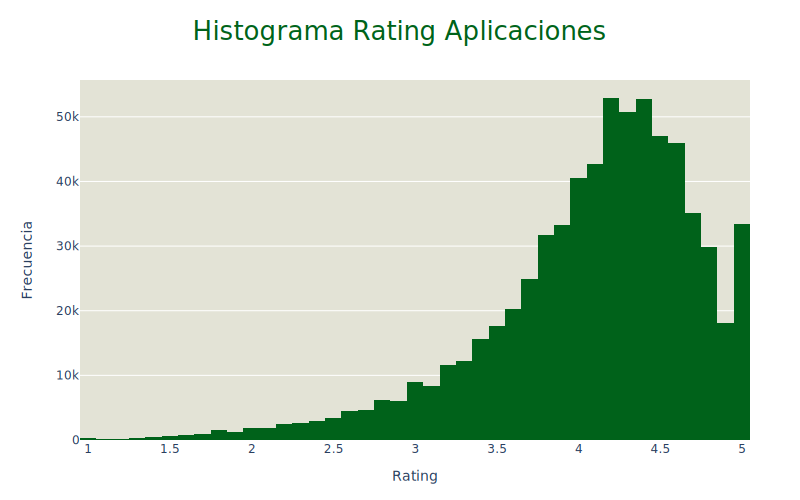

In [33]:
rating_hist = go.Figure()

rating_hist.add_trace(go.Histogram(
    x = datos['Rating'],
    marker = dict(color = '#00621A')
))
rating_hist.update_layout(
    margin = dict(r = 50, t = 80, b = 60),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#00621A'),
        text = 'Histograma Rating Aplicaciones',
        x = 0.5,
    ),
    xaxis_title_text = 'Rating',
    yaxis_title_text = 'Frecuencia',
    width = 800
)
rating_hist.show(renderer = 'svg')

## CATEGORÍAS

In [34]:
categories_frequency = datos['Category'].value_counts()

Se contabilizan las frecuencias de las categorías para posteriormente graficarlas:

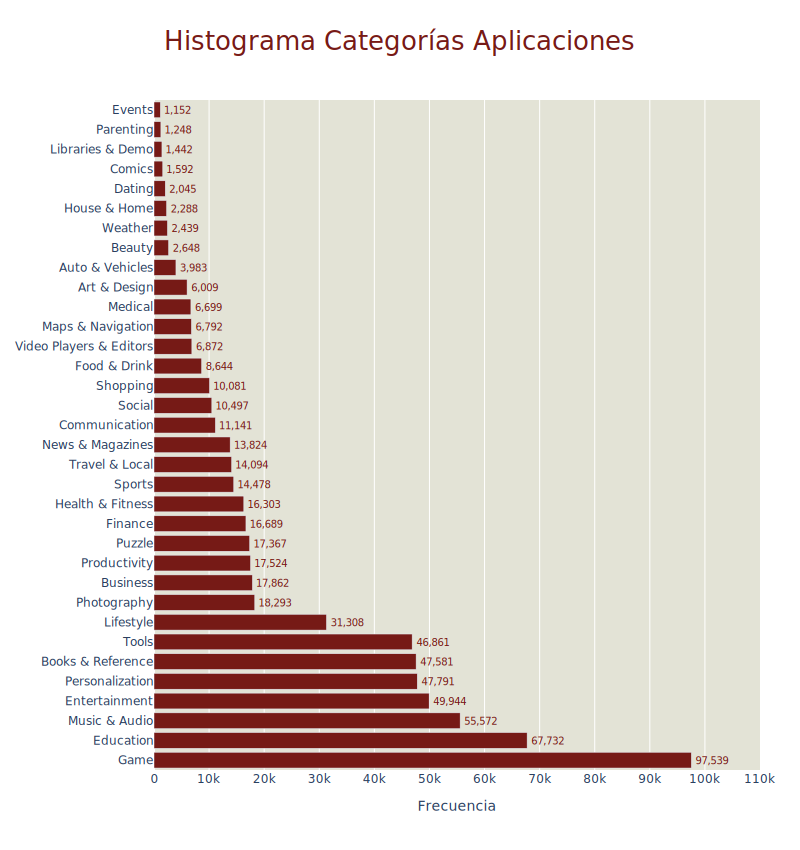

In [35]:
category_hist = go.Figure()

category_hist.add_trace(go.Bar(
    y = categories_frequency.index,
    x = categories_frequency,
    marker = dict(color = '#761A16'),
    orientation = 'h',
    text = categories_frequency,
    textfont = dict(color = '#761A16', size = 10),
    textposition = 'outside',
    texttemplate = [f'{y:,}' for y in categories_frequency]
))
category_hist.update_layout(
    height = 850,
    width = 800,
    margin = dict(r = 40),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#761A16'),
        text = 'Histograma Categorías Aplicaciones',
        x = 0.5,
    ),
    xaxis = dict(
        tick0 = 0, dtick = 10000, range = (0, 110000),
        title_text = 'Frecuencia'
    )
)
category_hist.show(renderer = 'svg')

## RATING COUNT

In [36]:
datos = datos[datos['Rating Count'] > 0]
rating_count = datos[datos['Rating Count'] < 80]

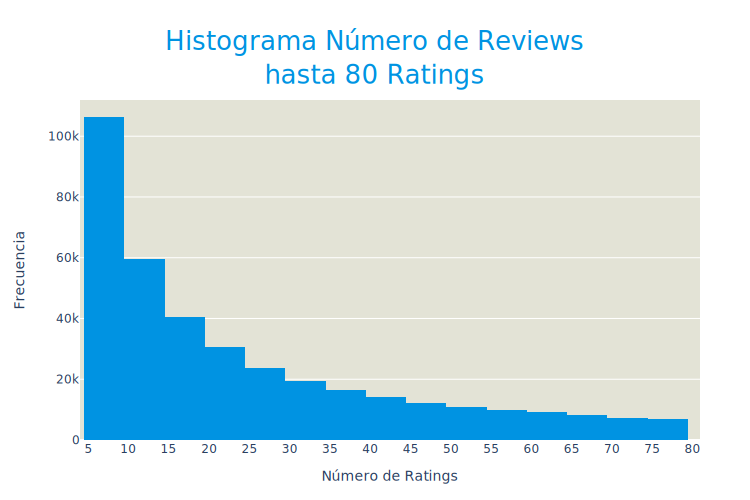

In [37]:
rating_count_hist = go.Figure()

rating_count_hist.add_trace(go.Histogram(
    x = rating_count['Rating Count'] ,
    marker = dict(color = '#0093E2'),
    nbinsx = 15
))
rating_count_hist.update_layout(
    width = 750,
    margin = dict(r = 50, b = 60),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#0093E2'),
        text = 'Histograma Número de Reviews<br>hasta 80 Ratings',
        x = 0.5
    ),
    yaxis_title_text = 'Frecuencia',
    xaxis = dict(
        tick0 = 0, dtick = 5, range = (4, 81),
        title_text = 'Número de Ratings'
    )
)
rating_count_hist.show(renderer = 'svg')

In [38]:
over_1Mr_less_30Mr = datos[(datos['Rating Count'] >= 1000000) & (datos['Rating Count'] <= 30000000)]

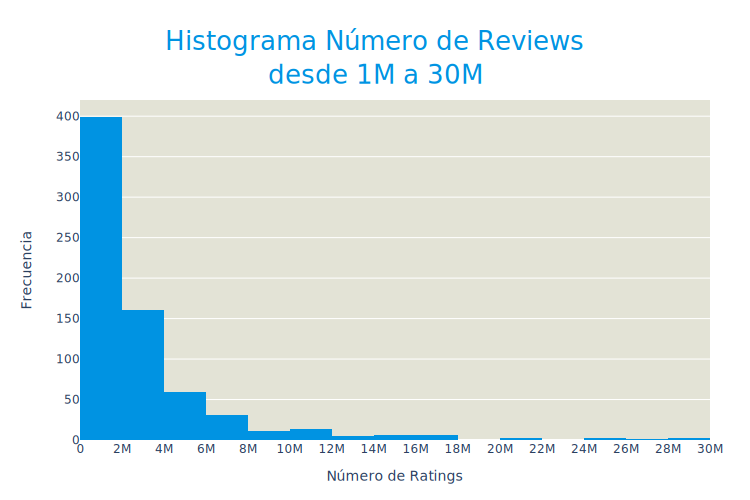

In [39]:
rating_count_hist = go.Figure()

rating_count_hist.add_trace(go.Histogram(
    x = over_1Mr_less_30Mr['Rating Count'] ,
    marker = dict(color = '#0093E2'),
    nbinsx = 15
))
rating_count_hist.update_layout(
    width = 750,
    margin = dict(r = 40, b = 60),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#0093E2'),
        text = 'Histograma Número de Reviews<br>desde 1M a 30M',
        x = 0.5
    ),
    yaxis_title_text = 'Frecuencia',
    xaxis = dict(
        tick0 = 0, dtick = 2000000, range = (0, 30000000),
        title_text = 'Número de Ratings'
    )
)
rating_count_hist.show(renderer = 'svg')

## VERSIÓN MÍNIMA DE ANDROID

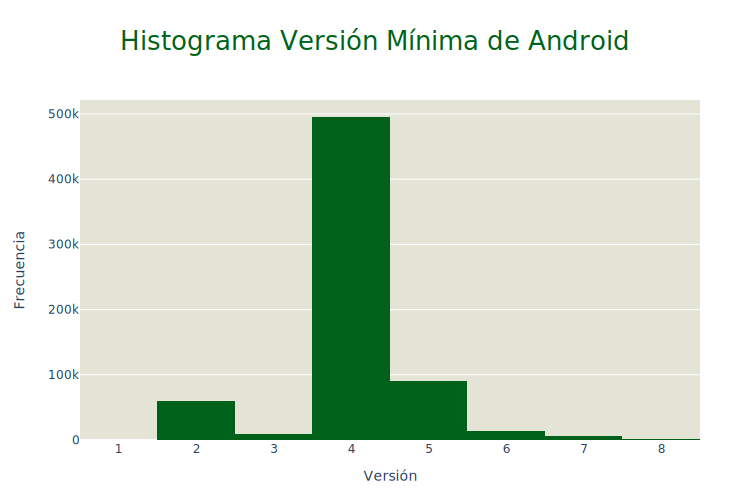

In [40]:
android_hist = go.Figure()

android_hist.add_trace(go.Histogram(
    x = datos['Minimum Android'],
    marker = dict(color = '#00621A'),
    nbinsx = 8
))
android_hist.update_layout(
    width = 750,
    margin = dict(r = 50, b = 60),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#00621A'),
        text = 'Histograma Versión Mínima de Android',
        x = 0.5
    ),
    xaxis = dict(
        title_text = 'Versión'
    ),
    yaxis_title_text = 'Frecuencia',
)
android_hist.show(renderer = 'svg')

## TAMAÑO

Se establece el tamaño hasta los 150.000 KB, dado que la mayoría de aplicaciones superiores a esta cantidad son traza y
desfavorecen una correcta visibilidad de los datos.

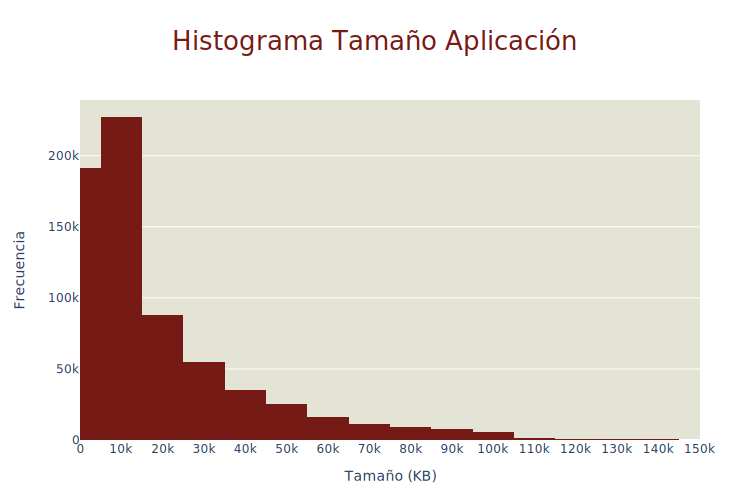

In [41]:
size_hist = go.Figure()

size_hist.add_trace(go.Histogram(
    x = datos[datos['Size'] < 150000]['Size'],
    marker = dict(color = '#761A16'),
    nbinsx = 18
))
size_hist.update_layout(
    width = 750,
    margin = dict(r = 50, b = 60),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#761A16'),
        text = 'Histograma Tamaño Aplicación',
        x = 0.5
    ),
    titlefont_size = 26,
    xaxis = dict(
        tick0 = 0, dtick = 10000, range = (0, 150000),
        title_text = 'Tamaño (KB)'
    ),
    yaxis_title_text = 'Frecuencia',
)
size_hist.show(renderer = 'svg')

## FECHA DE PUBLICACIÓN

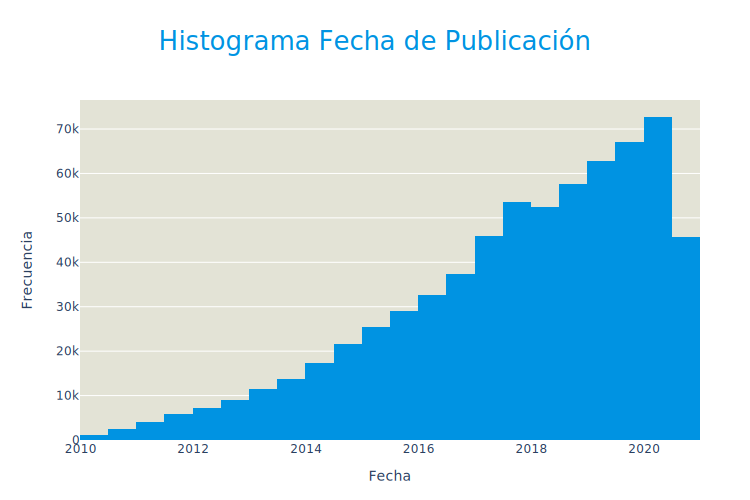

In [42]:
release_hist = go.Figure()

release_hist.add_trace(go.Histogram(
    x = datos['Released'],
    marker = dict(color = '#0093E2'),
    nbinsx = 22
))
release_hist.update_layout(
    width = 750,
    margin = dict(r = 50, b = 60),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#0093E2'),
        text = 'Histograma Fecha de Publicación',
        x = 0.5
    ),
    yaxis_title_text = 'Frecuencia',
    xaxis_title_text = 'Fecha'
)
release_hist.show(renderer = 'svg')

## FECHA DE ÚLTIMA ACTUALIZACIÓN

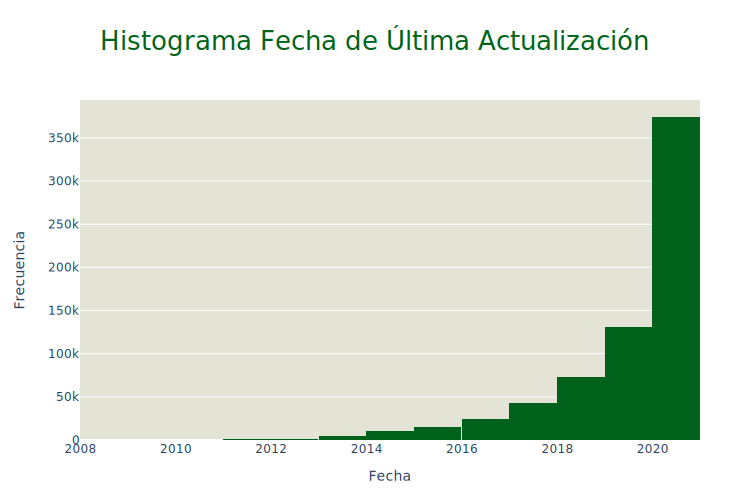

In [43]:
updated_hist = go.Figure()

updated_hist.add_trace(go.Histogram(
    x = datos['Last Updated'],
    marker = dict(color = '#00621A'),
    nbinsx = 22
))
updated_hist.update_layout(
    width = 750,
    margin = dict(r = 50, b = 60),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#00621A'),
        text = 'Histograma Fecha de Última Actualización',
        x = 0.5
    ),
    yaxis_title_text = 'Frecuencia',
    xaxis_title_text = 'Fecha'
)
updated_hist.show(renderer = 'svg')

## CANTIDAD DE APLICACIONES GRATUITAS Y DE PAGO

In [44]:
def graph_binary_pie(data, labels, colors, pull = (0, 0.2)):
    count_frec = data.value_counts()
    pie = go.Figure()
    pie.add_pie(
        labels = labels,
        values = count_frec,
        pull = pull,
        hole = 0.1,
        textfont = dict(color = colors),
        textposition = 'outside',
        textinfo = 'label+percent',
        marker_colors = colors
    )
    pie.update_layout(
        width = 500,
        height = 400,
        margin = dict(r = 2, l = 2, b = 2, t = 2)
    )
    pie.show(renderer = 'svg')

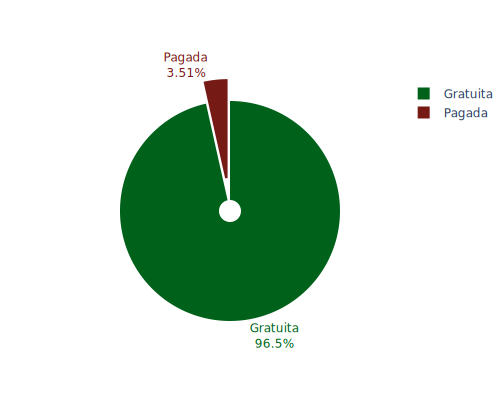

In [45]:
graph_binary_pie(datos.Free, ['Gratuita', 'Pagada'], ['#00621A', '#761A16'])

## PRESENCIA DE PUBLICIDAD

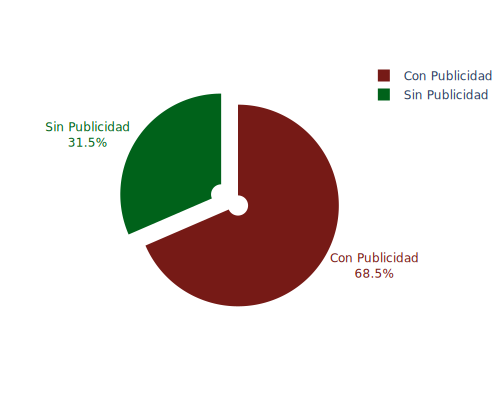

In [46]:
graph_binary_pie(datos['Ad Supported'], ['Con Publicidad', 'Sin Publicidad'], ['#761A16', '#00621A'])

## COMPRAS O TIENDA DENTRO DE LA APLICACIÓN (MICRO-VENTAS)

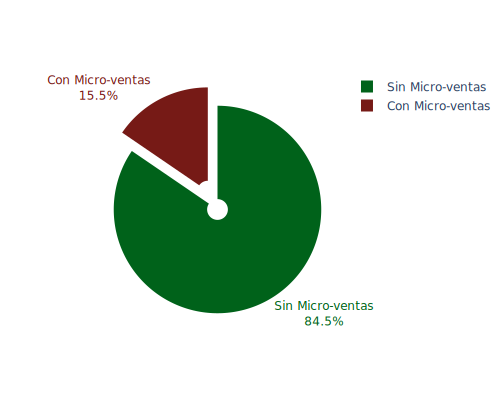

In [47]:
graph_binary_pie(datos['In App Purchases'], ['Sin Micro-ventas', 'Con Micro-ventas'], ['#00621A', '#761A16'])

## ELECCIÓN DEL EDITOR

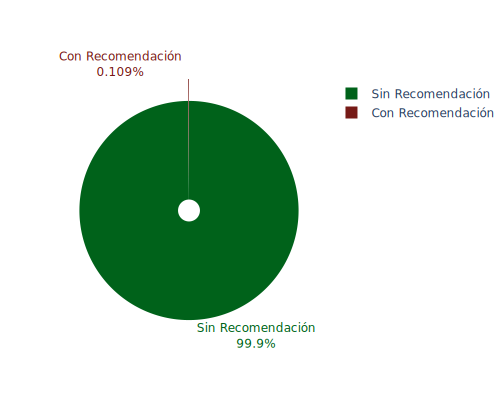

In [48]:
graph_binary_pie(datos['Editors Choice'], ['Sin Recomendación', 'Con Recomendación'], ['#00621A', '#761A16'])

## RATING DEL CONTENIDO

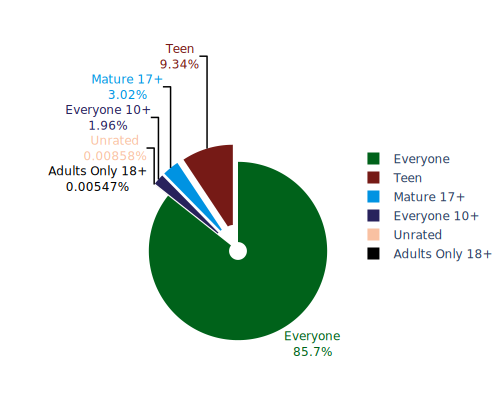

In [49]:
graph_binary_pie(datos['Content Rating'],
                 ['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Unrated', 'Adults Only 18+'],
                 ['#00621A', '#761A16', '#0093E2', '#28225C', '#F9C1A2', '#000000'],
                 [0, 0.2, 0.2, 0.2, 0.2, 0.2])

## PRECIO

In [50]:
paid = datos['Price USD'] != 0
datos[paid]['Price USD'].describe()

count    23707.000000
mean         4.323809
std         12.549313
min          0.990000
25%          0.990000
50%          1.990000
75%          3.990000
max        399.990000
Name: Price USD, dtype: float64

In [51]:
paid_apps = datos[paid]['Price USD'].value_counts()

In [52]:
less_10 = datos[(datos['Price USD'] > 0) & (datos['Price USD'] < 10)]

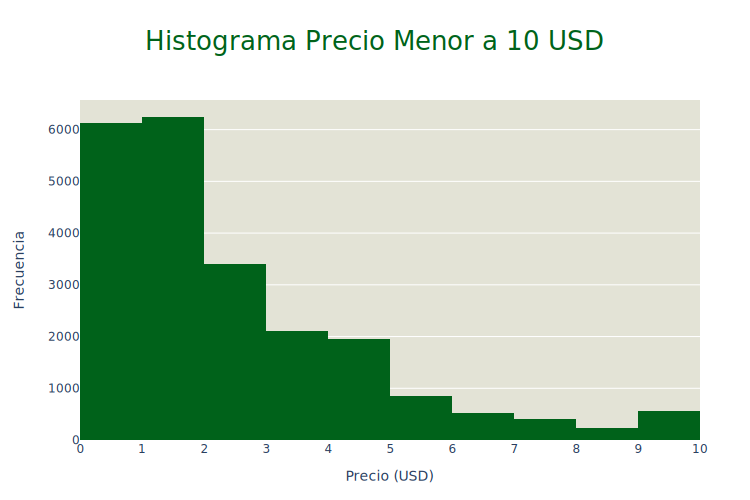

In [53]:
price_less_10_hist = go.Figure()
price_less_10_hist.add_trace(go.Histogram(
    x = less_10['Price USD'],
    nbinsx = 15,
    marker = dict(color = '#00621a'),
))
price_less_10_hist.update_layout(
    width = 750,
    margin = dict(r = 50, b = 60),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#00621a'),
        text = 'Histograma Precio Menor a 10 USD',
        x = 0.5
    ),
    yaxis_title_text = 'Frecuencia',
    xaxis = dict(
        tick0 = 0, dtick = 1, range = (0, 10),
        title_text = 'Precio (USD)'
    )
)
price_less_10_hist.show(renderer = 'svg')

## RANGOS DE CANTIDAD DE INSTALACIONES

In [54]:
installs_groups = datos['Installs'].value_counts().sort_values()
installs_groups

10,000,000,000+         1
5,000,000,000+          9
1,000,000,000+         46
500,000,000+           51
0+                     59
1+                    111
5+                    252
100,000,000+          399
50,000,000+           680
10+                  4648
10,000,000+          5083
5,000,000+           5437
50+                  6152
500,000+            20586
1,000,000+          26827
100+                39344
500+                39400
50,000+             51275
5,000+              78391
100,000+            79889
10,000+            156913
1,000+             160781
Name: Installs, dtype: int64

In [55]:
order_installs_ranges = ['0+', '1+', '5+', '10+', '50+', '100+', '500+', '1,000+', '5,000+', '10,000+',
                         '50,000+', '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+', '50,000,000+',
                         '100,000,000+', '500,000,000+', '1,000,000,000+', '5,000,000,000+', '10,000,000,000+']
installs_groups_ordered = []
for i_group in order_installs_ranges:
    installs_groups_ordered.append(installs_groups[i_group])

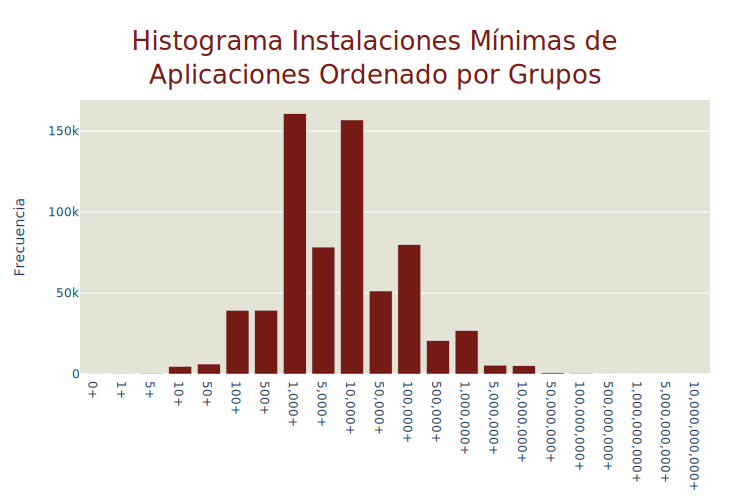

In [56]:
installs_ordered_hist = go.Figure()
installs_ordered_hist.add_trace(go.Bar(
    x = order_installs_ranges,
    y = installs_groups_ordered,
    marker = dict(color = '#761A16'),
))
installs_ordered_hist.update_layout(
    width = 750,
    margin = dict(r = 40),
    title = dict(
        font = dict(size = 26, color = '#761A16'),
        text = 'Histograma Instalaciones Mínimas de<br>Aplicaciones Ordenado por Grupos',
        x = 0.5
    ),
    plot_bgcolor = '#E3E3D6',
    yaxis_title_text = 'Frecuencia',
)
installs_ordered_hist.show(renderer = 'svg')

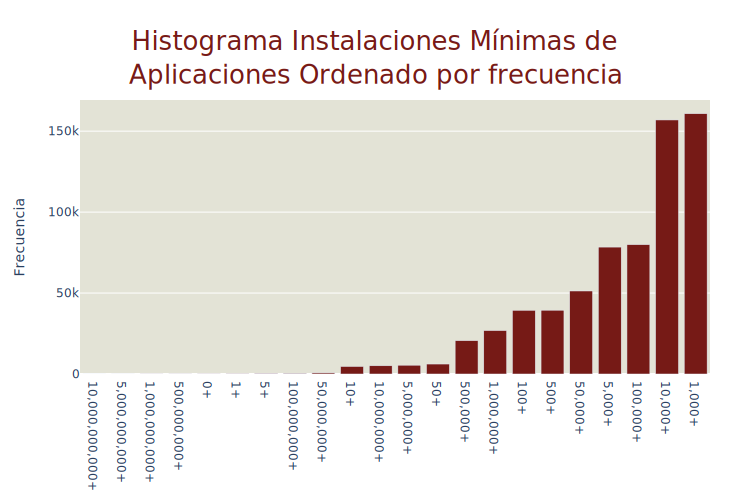

In [57]:
installs_hist = go.Figure()
installs_hist.add_trace(go.Bar(
    x = installs_groups.index,
    y = installs_groups,
    marker = dict(color = '#761A16'),
))
installs_hist.update_layout(
    width = 750,
    margin = dict(r = 40),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#761A16'),
        text = 'Histograma Instalaciones Mínimas de<br>Aplicaciones Ordenado por frecuencia',
        x = 0.5,
    ),
    yaxis_title_text = 'Frecuencia',
)
installs_hist.show(renderer = 'svg')

## CATEGORÍA DE JUEGOS

In [58]:
only_games = datos[datos['Game Category'] != 'No Juego']
game_categories_frequency = only_games['Game Category'].value_counts()

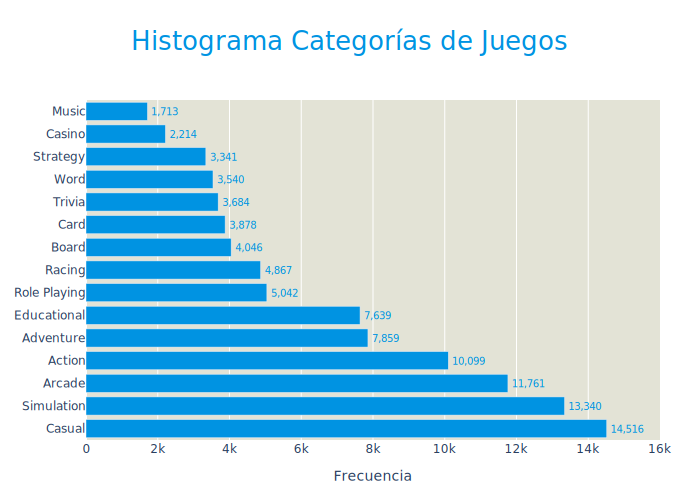

In [59]:
game_category_hist = go.Figure()

game_category_hist.add_trace(go.Bar(
    y = game_categories_frequency.index,
    x = game_categories_frequency,
    marker = dict(color = '#0093E2'),
    orientation = 'h',
    textfont = dict(color = '#0093E2', size = 10),
    textposition = 'outside',
    texttemplate = [f'{y:,}' for y in game_categories_frequency]
))
game_category_hist.update_layout(
    width = 700,
    margin = dict(r = 40, b = 60),
    plot_bgcolor = '#E3E3D6',
    title = dict(
        font = dict(size = 26, color = '#0093E2'),
        text = 'Histograma Categorías de Juegos',
        x = 0.5
    ),
    xaxis = dict(
        tick0 = 0, dtick = 2000, range = (0, 16000),
        title_text = 'Frecuencia'
    )
)
game_category_hist.show(renderer = 'svg')

# PREPROCESSING EN ANÁLISIS EXPLORATORIO

Segundo pre-procesado realizado en la exploración univariable de los datos:
1. Se eliminan las filas cuya cantidad de reviews o rating sea cero.
2. Se elimina la columna Game Category que solo fue empleada para guardado temporal de categorías de juego y para su
análisis y visualización.
3. Se elimina columna App Name.
4. Se elimina columna Installs, usada como descripción de datos para análisis.
5. Es tan poca la cantidad de aplicaciones con sello del editor que resulta ser despreciable en comparación al total de
aplicaciones disponibles con reviews, por lo tanto, también se elimina esta columna.
6. Se cambia el tipo de dato de las columnas “Rating Count” y “Size” de float64 a int64.

In [60]:
datos = datos.drop(columns = ['App Name', 'Installs', 'Editors Choice', 'Game Category'])
datos['Rating Count'] = datos['Rating Count'].astype('int64')
datos['Size'] = datos['Size'].astype('int64')
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676334 entries, 0 to 1118135
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App Id            676334 non-null  object        
 1   Category          676334 non-null  object        
 2   Rating            676334 non-null  float64       
 3   Rating Count      676334 non-null  int64         
 4   Minimum Installs  676334 non-null  int64         
 5   Maximum Installs  676334 non-null  int64         
 6   Free              676334 non-null  bool          
 7   Size              676334 non-null  int64         
 8   Minimum Android   676334 non-null  float64       
 9   Released          676334 non-null  datetime64[ns]
 10  Content Rating    676334 non-null  object        
 11  Ad Supported      676334 non-null  bool          
 12  In App Purchases  676334 non-null  bool          
 13  Price USD         676334 non-null  float64       
dtypes: 

Se crea un nuevo dataset ya limpio, arreglado y listo para trabajar:

In [61]:
datos.to_csv('GooglePlayStore_Preprocesed.csv', index = False)
